<a href="https://colab.research.google.com/github/Foster1466/Tensorflow-in-practice/blob/master/Course_3_week_4_(HW).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np

In [2]:
tokenizer= Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

data= open('/tmp/sonnets.txt').read()

corpus= data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words= len(tokenizer.word_index) + 1

input_sequences= []
for line in corpus:
  token_list= tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence= token_list[:i+1]
    input_sequences.append(n_gram_sequence)

max_sequence_len= max([len(x) for x in input_sequences])
input_sequences= np.array(pad_sequences(input_sequences, maxlen= max_sequence_len, padding='pre'))

predictors, label= input_sequences[:,:-1], input_sequences[:,-1]
label= ku.to_categorical(label, num_classes=total_words)

print(len(input_sequences))

--2020-11-16 07:47:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-11-16 07:47:00 (105 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]

15462


In [3]:
model= Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer= regularizers.L2(0.01)))
model.add(Dense(total_words, activation='softmax'))

model.compile(optimizer= Adam(0.01), loss= 'categorical_crossentropy', metrics= ['accuracy'])


(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300)               541200    
_________________________________________________________________
dense (Dense)                (None, 1605)              483105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,803,471
Trainable params: 6,803,471
Non-trainable params: 0
______________________________________________

In [4]:
history= model.fit(predictors, label, epochs= 100, verbose=1)

Epoch 1/100
484/484 [==============================] - 7s 14ms/step - loss: 6.9157 - accuracy: 0.0217
Epoch 2/100
484/484 [==============================] - 7s 14ms/step - loss: 6.4945 - accuracy: 0.0263
Epoch 3/100
484/484 [==============================] - 7s 14ms/step - loss: 6.3783 - accuracy: 0.0321
Epoch 4/100
484/484 [==============================] - 6s 13ms/step - loss: 6.3171 - accuracy: 0.0332
Epoch 5/100
484/484 [==============================] - 6s 13ms/step - loss: 6.2668 - accuracy: 0.0347
Epoch 6/100
484/484 [==============================] - 6s 13ms/step - loss: 6.2427 - accuracy: 0.0366
Epoch 7/100
484/484 [==============================] - 6s 13ms/step - loss: 6.2136 - accuracy: 0.0366
Epoch 8/100
484/484 [==============================] - 6s 13ms/step - loss: 6.1631 - accuracy: 0.0376
Epoch 9/100
484/484 [==============================] - 6s 13ms/step - loss: 6.1276 - accuracy: 0.0380
Epoch 10/100
484/484 [==============================] - 6s 13ms/step - loss: 6.108

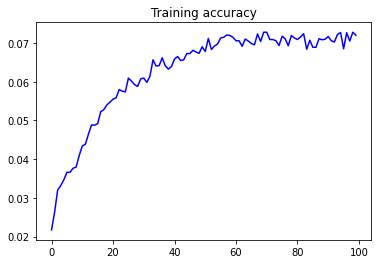

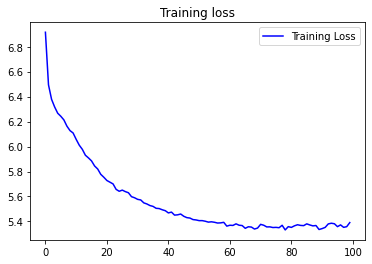

In [5]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [9]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words= 100

for _ in range(next_words):
  token_list= tokenizer.texts_to_sequences([seed_text])[0]
  token_list= pad_sequences([token_list], maxlen= max_sequence_len-1, padding= 'pre')
  predicted= model.predict_classes(token_list, verbose=0)
  output_word= ""

  for word, index in tokenizer.word_index.items():
    if index==predicted:
      output_word= word
      break
  seed_text += " " + output_word

print(seed_text)
print(len(seed_text))

Help me Obi Wan Kenobi, you're my only hope thousand in the world of ill minds to make the love and yet to be is not be i see the time to be is to be near be in the world of ill minds to be is be i see the world of ill minds to make the time to be is be thou art is i see the world ' to be is i see thee to be not be i see thee and all my love and all my love and that be is and all my love ' in the world of ill minds to make
426
